# Clustering

Perform clustering. Typically use Leiden algorithms. Also implemented K-means clustering, Hierarchical clustering, but have inactivated.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import scipy.sparse
import sys 
import os
sys.path.append(os.path.abspath("D:\jupyter_3_10\jl_modules"))
import sc_module as sm

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

# *** Input File ***  h5 file  
sample_name = r'sc92'
h5_file_path = r'results/'

# integration = 'combat'
# integration = 'harmony'
integration = 'scanorama'
if integration == 'combat':
    h5_file = h5_file_path + sample_name + '_combat_corrected_scran.h5ad'
elif integration == 'harmony':
    h5_file = h5_file_path + sample_name + '_harmony_corrected_scran.h5ad'
elif integration == 'scanorama':
    h5_file = h5_file_path + sample_name + '_scanorama_corrected_scran.h5ad'


# use if batch correction is in question or single sample
# h5_file = h5_file_path + sample_name + '_lognorm_scran.h5ad'   
lognorm = True  # set true if using lognorm data
lognorm = False

# filtered data to be updated with cluster information
filtered_file = h5_file_path + sample_name + '_filt.h5ad'

# Path to output data
results_file_path = r'results/'
clustered_file = results_file_path + sample_name + r'_clustered.h5ad'
clustered_filtered_file = results_file_path + sample_name + r'_filt_clustered.h5ad'  # the file that will store the raw counts plus cluster data


scanpy==1.10.1 anndata==0.8.0 umap==0.5.3 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.1.1 statsmodels==0.14.2 igraph==0.10.8 louvain==0.8.2 pynndescent==0.5.7


In [2]:
adata = sc.read_h5ad(h5_file)
adata.uns['log1p']["base"] = None    # bug fix

# adata.obs_names_make_unique()
print(adata.obs['sample'].value_counts())
print()
print(adata)
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
60day3    12058
60day1    10254
60day2     9609
Name: count, dtype: int64

AnnData object with n_obs × n_vars = 31921 × 24178
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_

Flip y-axis to place macrophages at top of plot.

In [3]:
adata.obsm['X_umap'][:,1] = adata.obsm['X_umap'][:,1]*-1

#### Check input data

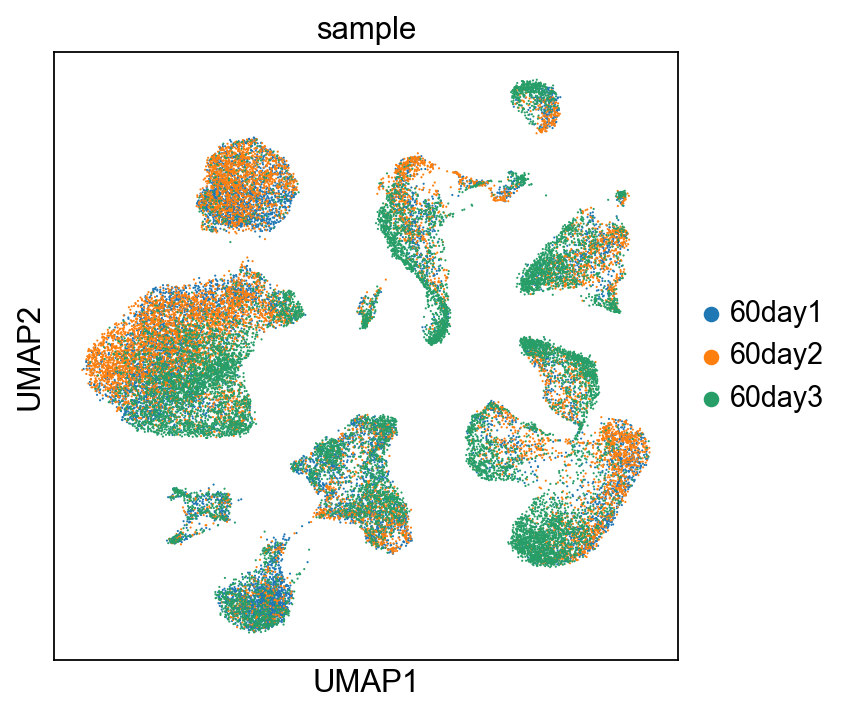

In [4]:
# sc.pp.highly_variable_genes(adata)


# if integration == 'combat':
#     pass
# elif integration == 'harmony':
#     pass
# elif integration == 'scanorama':
#     sc.pp.neighbors(adata, n_pcs = 30, use_rep = "Scanorama")
#     sc.tl.umap(adata)

if lognorm:
    sc.pp.pca(adata, n_comps=30, use_highly_variable=True, svd_solver='arpack')
    sc.pp.neighbors(adata, n_pcs =30)
    sc.tl.umap(adata)

rcParams['figure.figsize'] = 5, 5
sc.pl.umap(adata, color="sample")

## Graph clustering
The procedure of clustering on a Graph can be generalized as 3 main steps:

1) Build a kNN graph from the data

2) Prune spurious connections from kNN graph (optional step). This is a SNN graph.

3) Find groups of cells that maximizes the connections within the group compared other groups.

The modularity optimization algorithms in Scanpy are Leiden and Louvain. They generally give similar results. Leiden is generally considered better.

### Leiden

In [5]:
sc.tl.leiden(adata, resolution = 0.2, key_added = "leiden_0.2")
sc.tl.leiden(adata, resolution = 0.3, key_added = "leiden_0.3")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(adata, resolution = 1.0, key_added = "leiden_1.0")   # default resolution in 1.0
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")
sc.tl.leiden(adata, resolution = 1.7, key_added = "leiden_1.7")
sc.tl.leiden(adata, resolution = 2.0, key_added = "leiden_2.0")
sc.tl.leiden(adata, resolution = 2.5, key_added = "leiden_2.5")
sc.tl.leiden(adata, resolution = 3.0, key_added = "leiden_3.0")
sc.tl.leiden(adata, resolution = 3.5, key_added = "leiden_3.5")
sc.tl.leiden(adata, resolution = 4.0, key_added = "leiden_4.0")
sc.tl.leiden(adata, resolution = 4.5, key_added = "leiden_4.5")

running Leiden clustering


C:\Users\david\AppData\Local\Temp\ipykernel_37032\2615850954.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.2, key_added = "leiden_0.2")


    finished: found 13 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 

Plot the clusters with increased resolution.

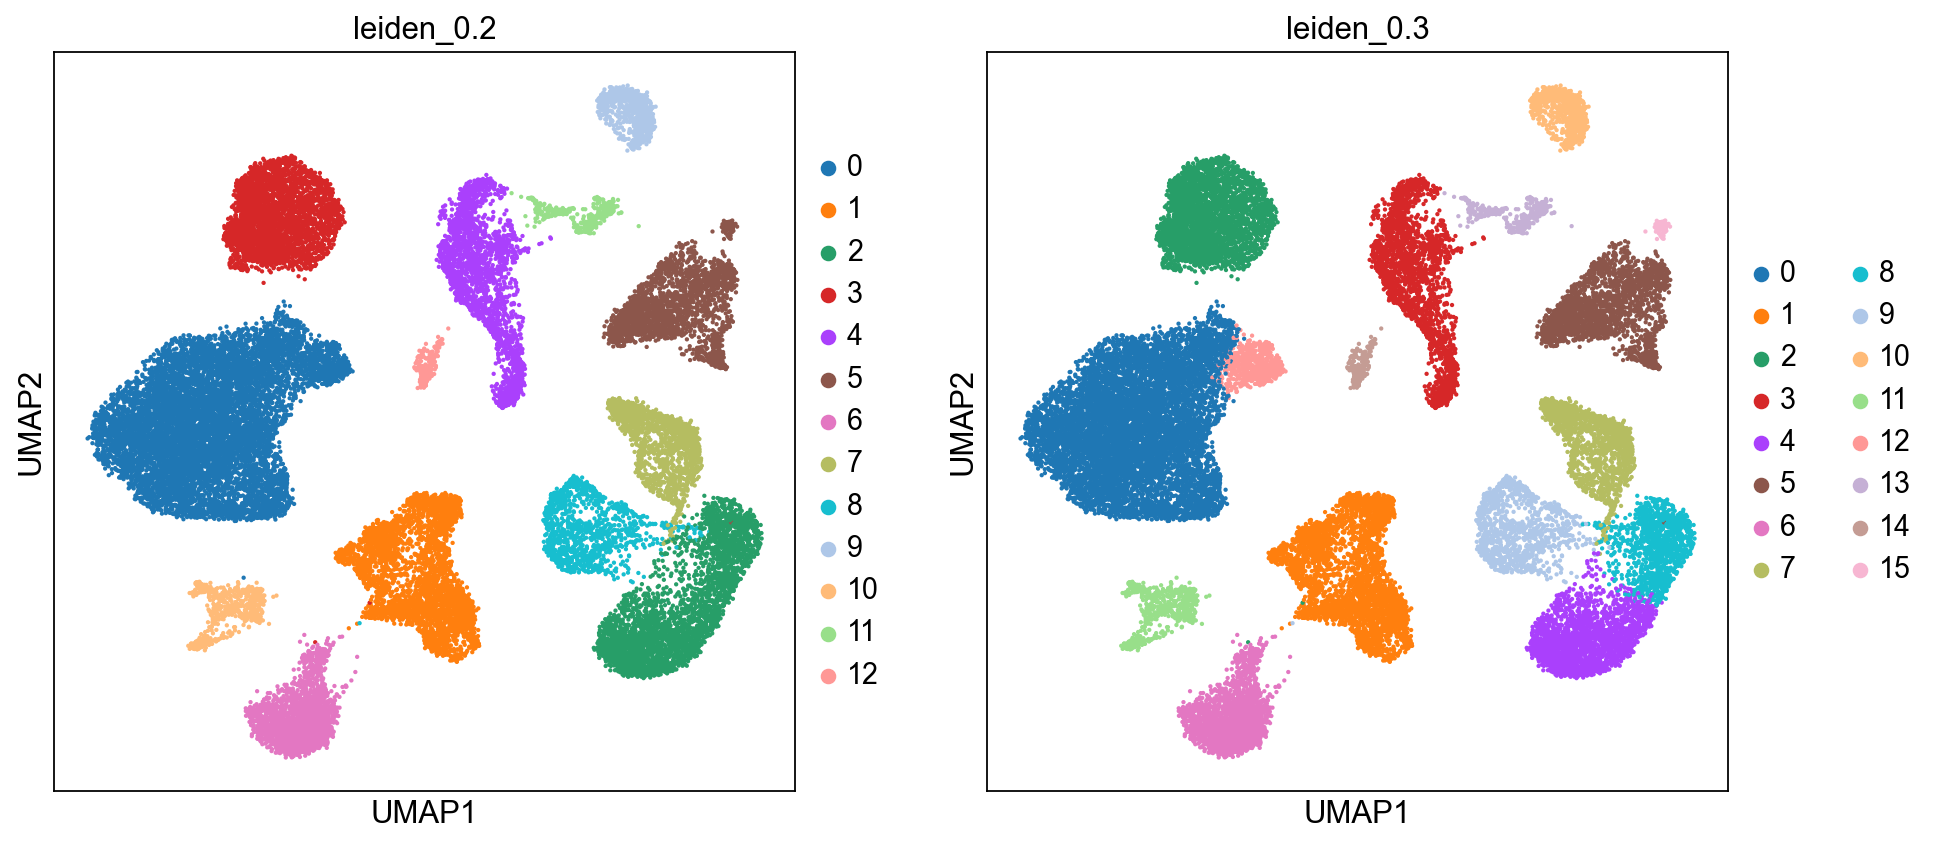

In [6]:
rcParams['figure.figsize'] = 6, 6
sc.pl.umap(adata, color=['leiden_0.2', 'leiden_0.3'], size=15)

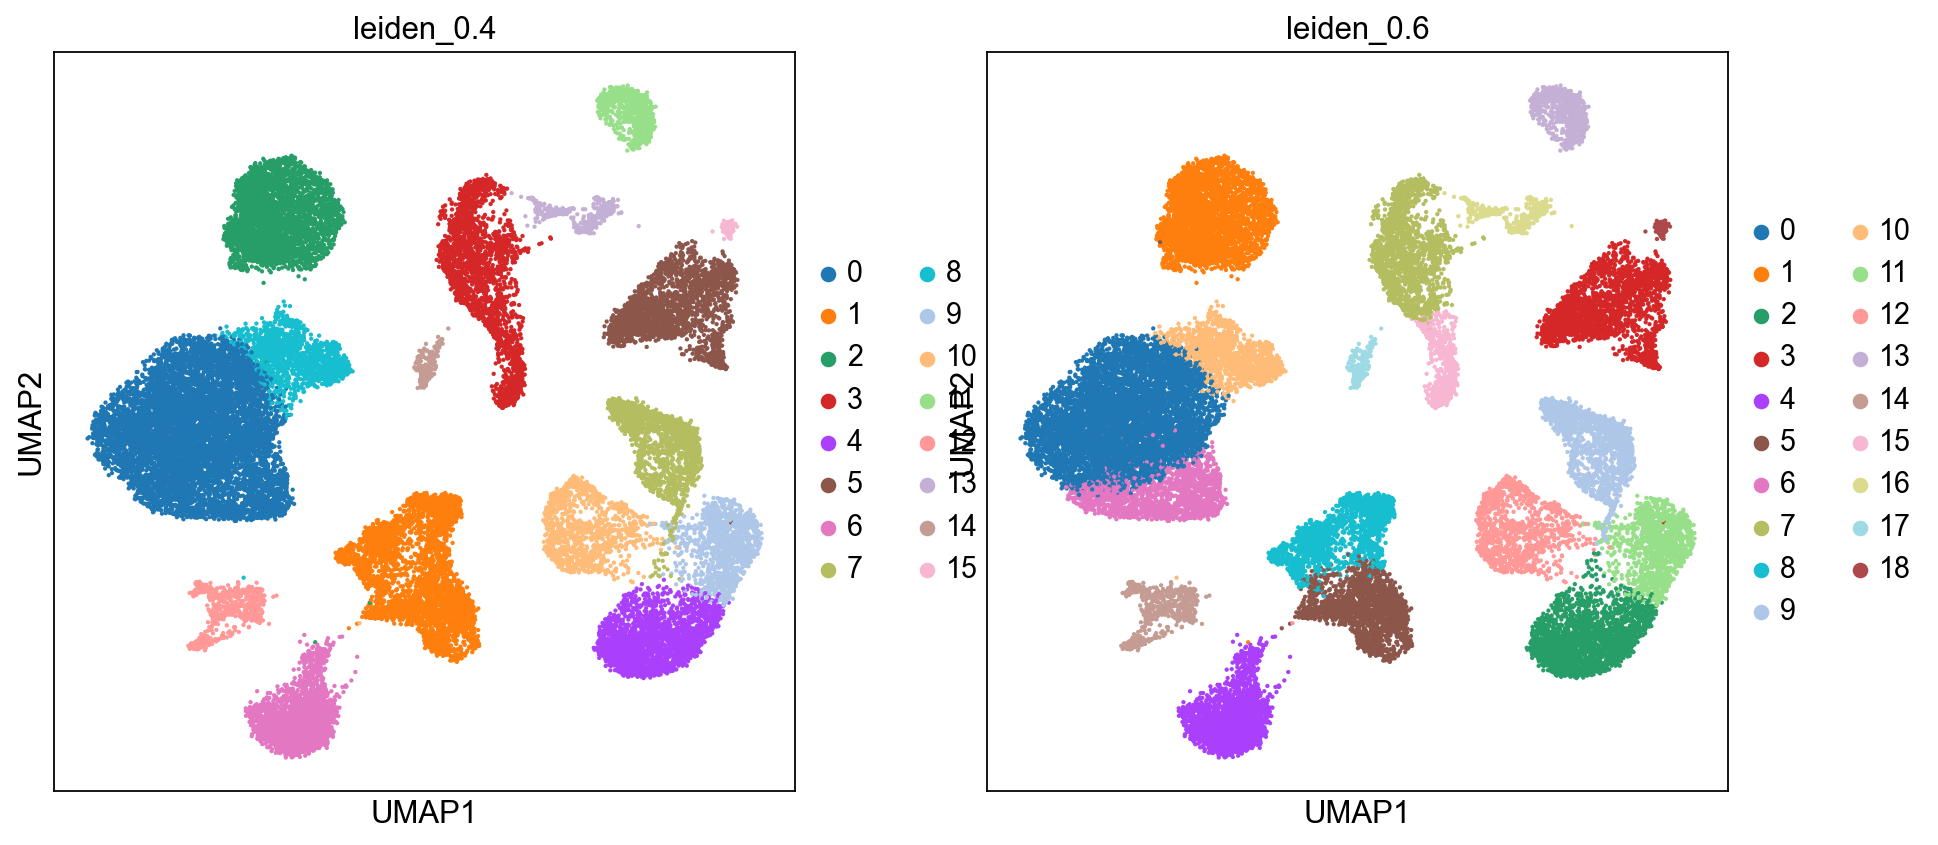

In [7]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6'], size=15)

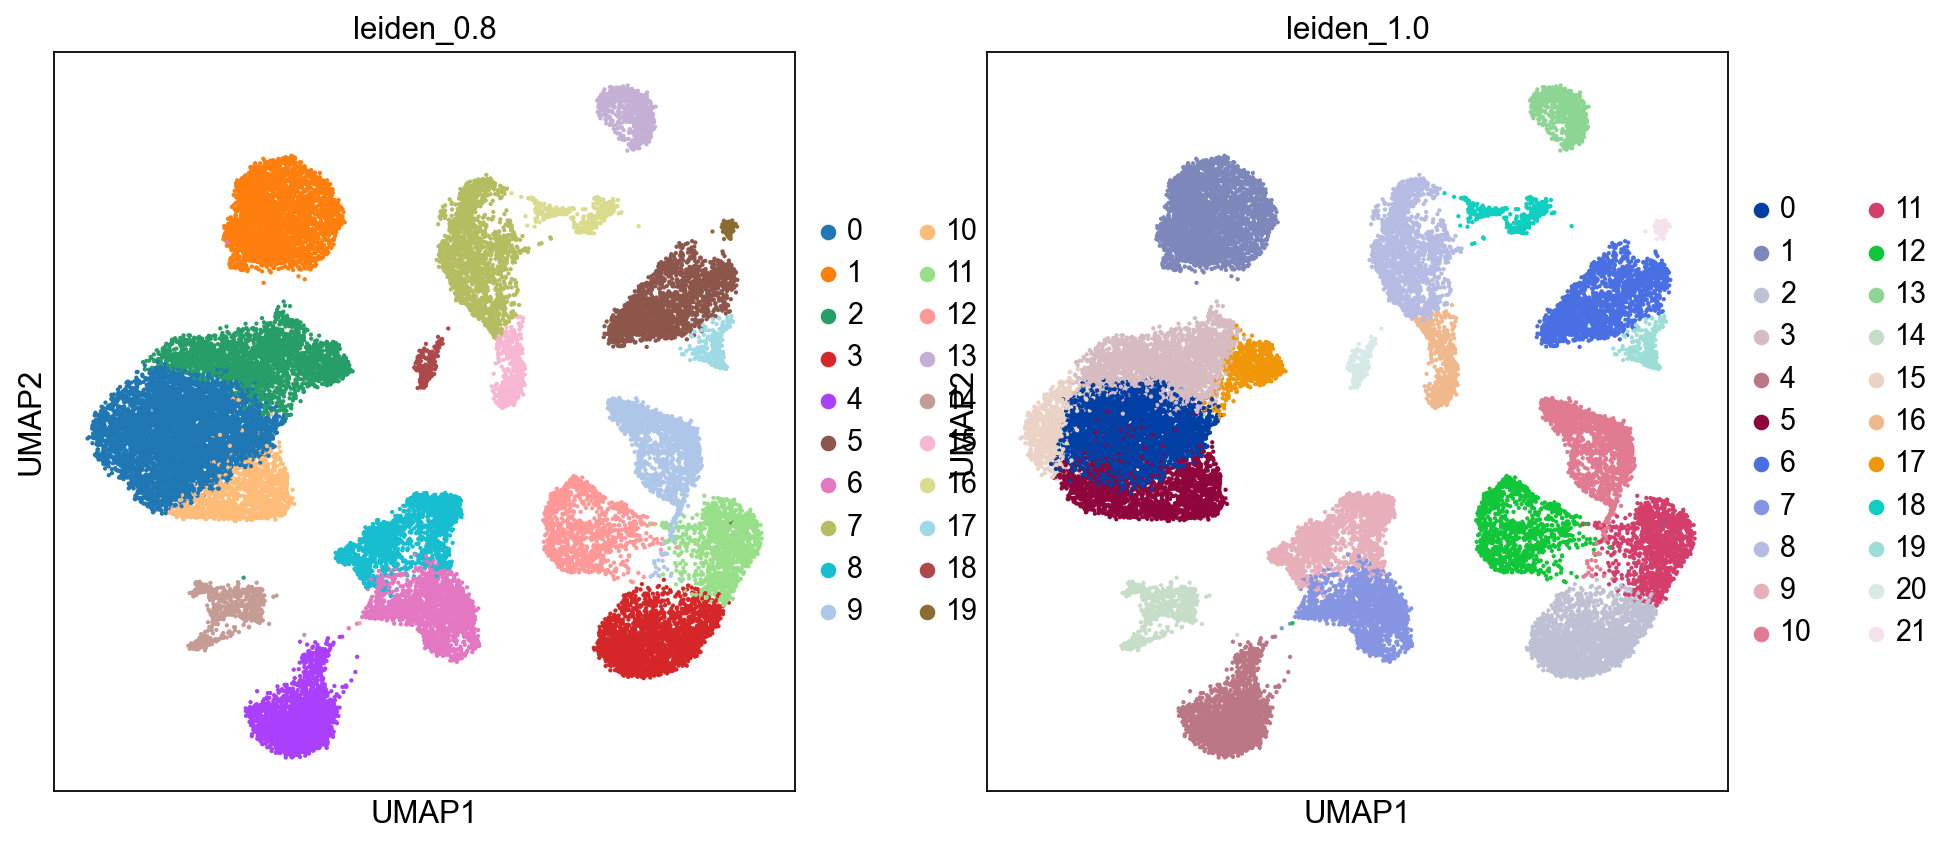

In [8]:
sc.pl.umap(adata, color=['leiden_0.8','leiden_1.0'], size=15)

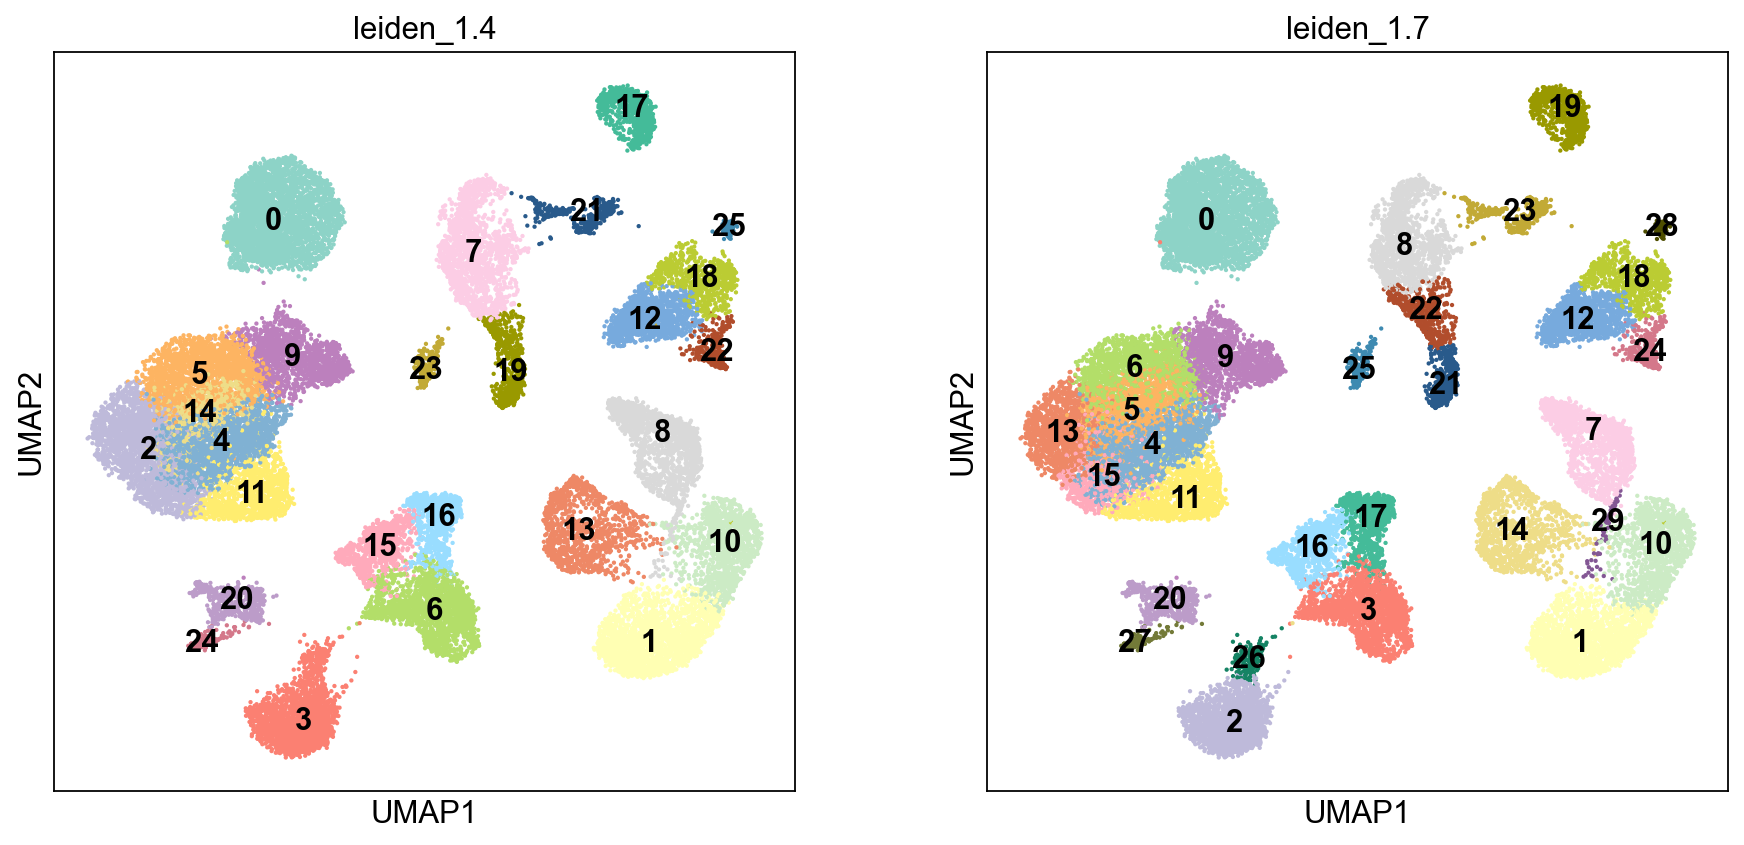

In [9]:
sc.pl.umap(adata, color=['leiden_1.4','leiden_1.7'], size=15, legend_loc='on data', palette=sm.wes)

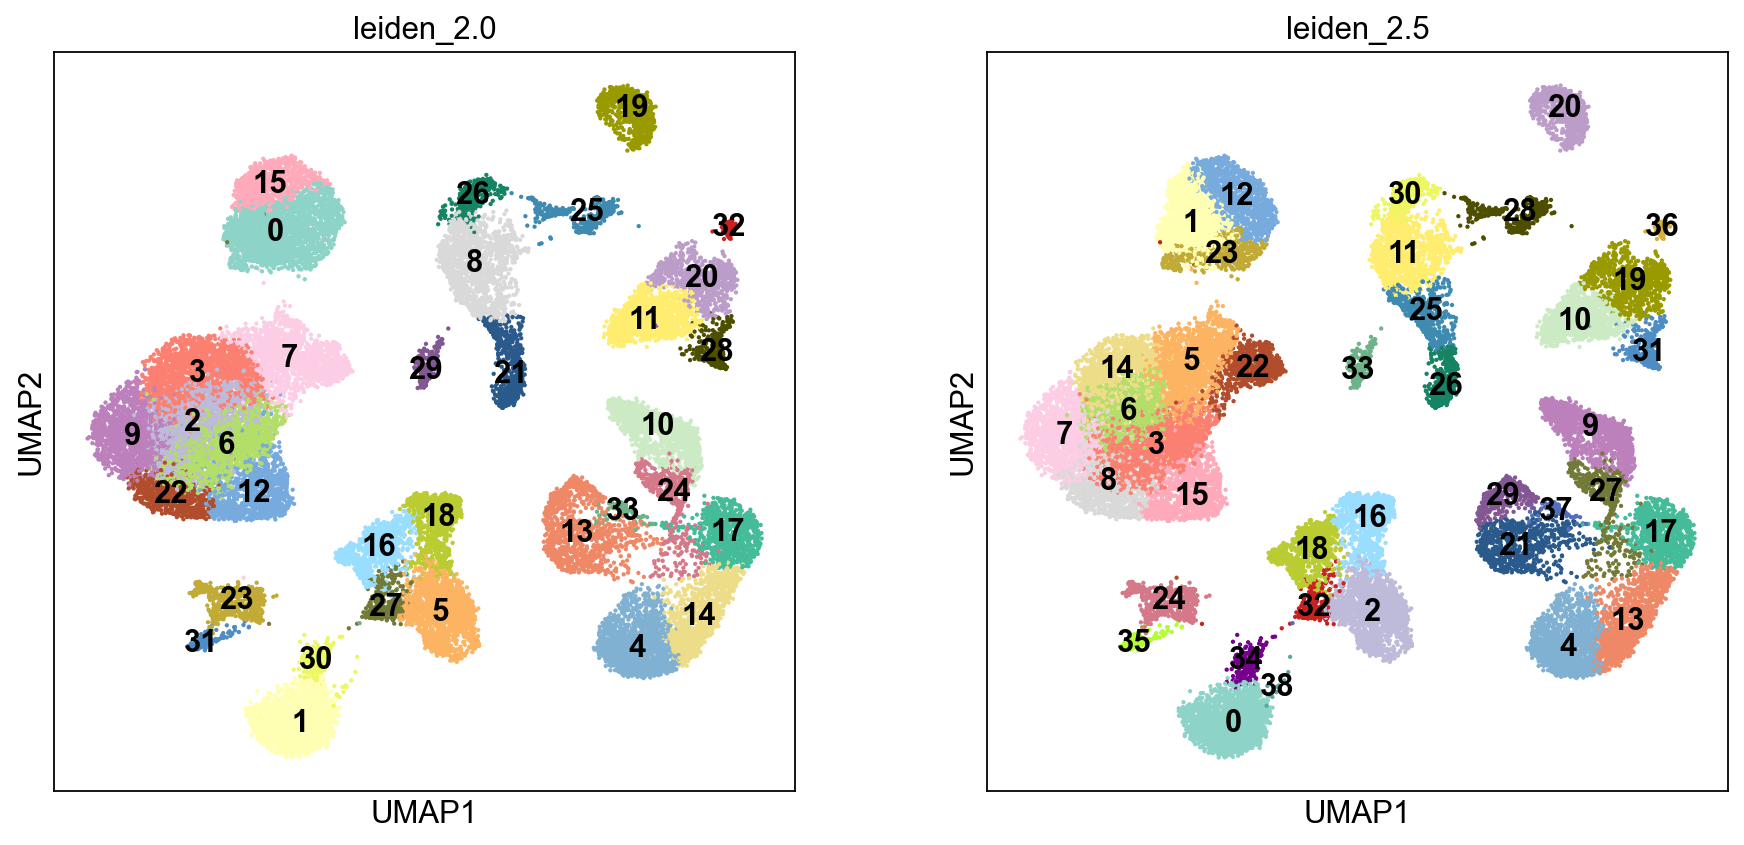

In [10]:
sc.pl.umap(adata, color=['leiden_2.0','leiden_2.5'], size=15, legend_loc='on data', palette=sm.wes)

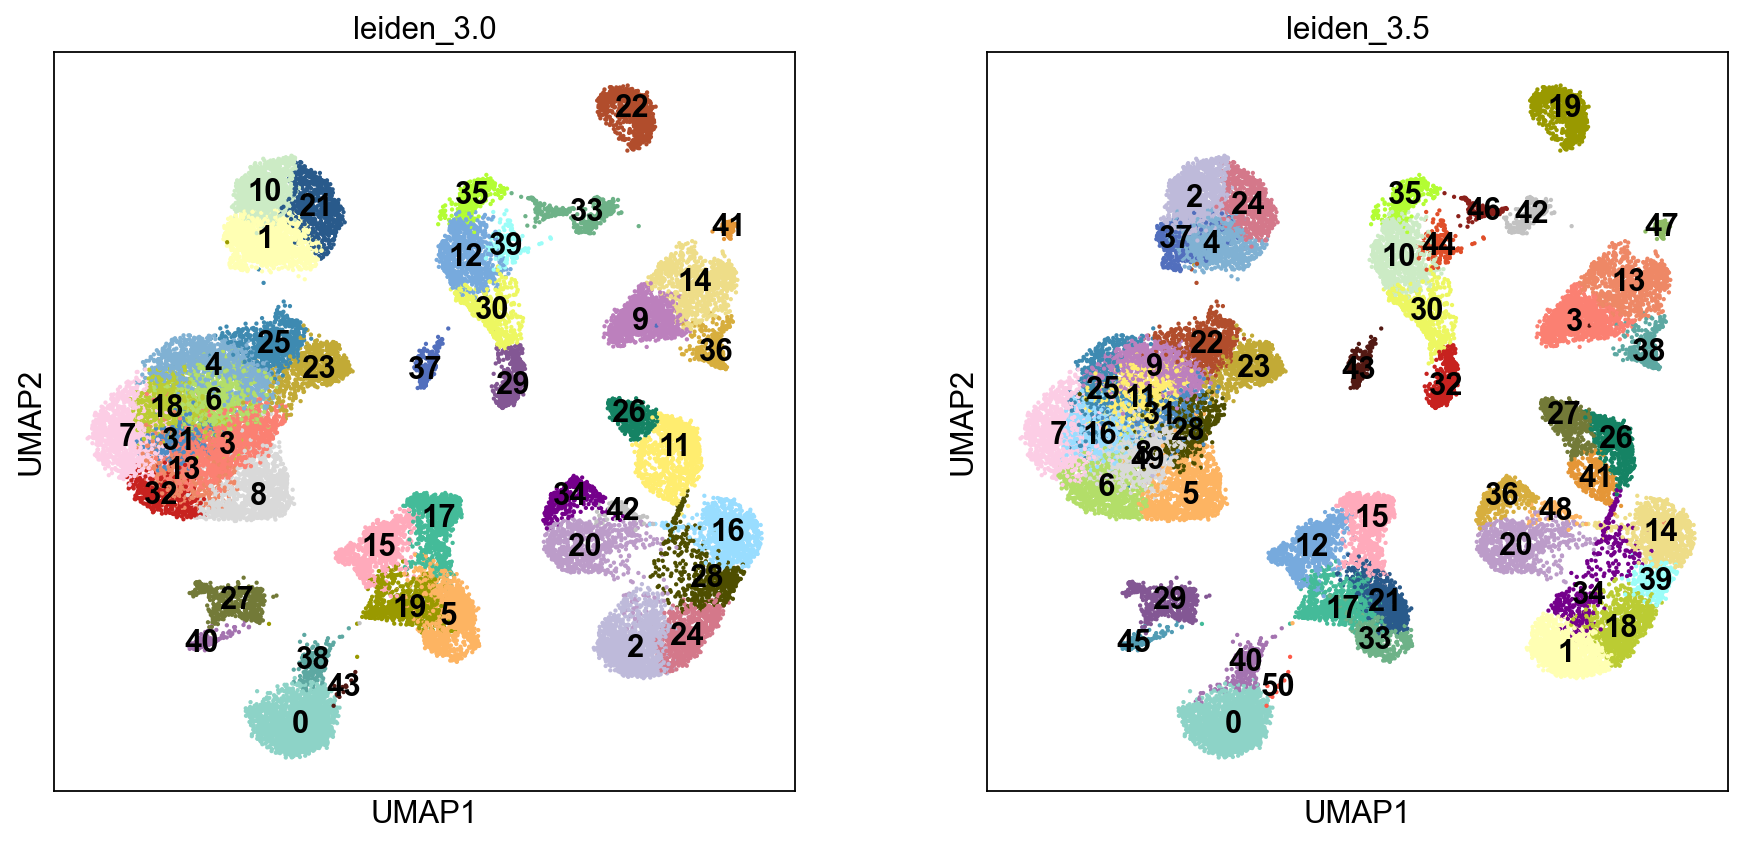

In [11]:
sc.pl.umap(adata, color=['leiden_3.0','leiden_3.5'], size=15, legend_loc='on data', palette=sm.wes)

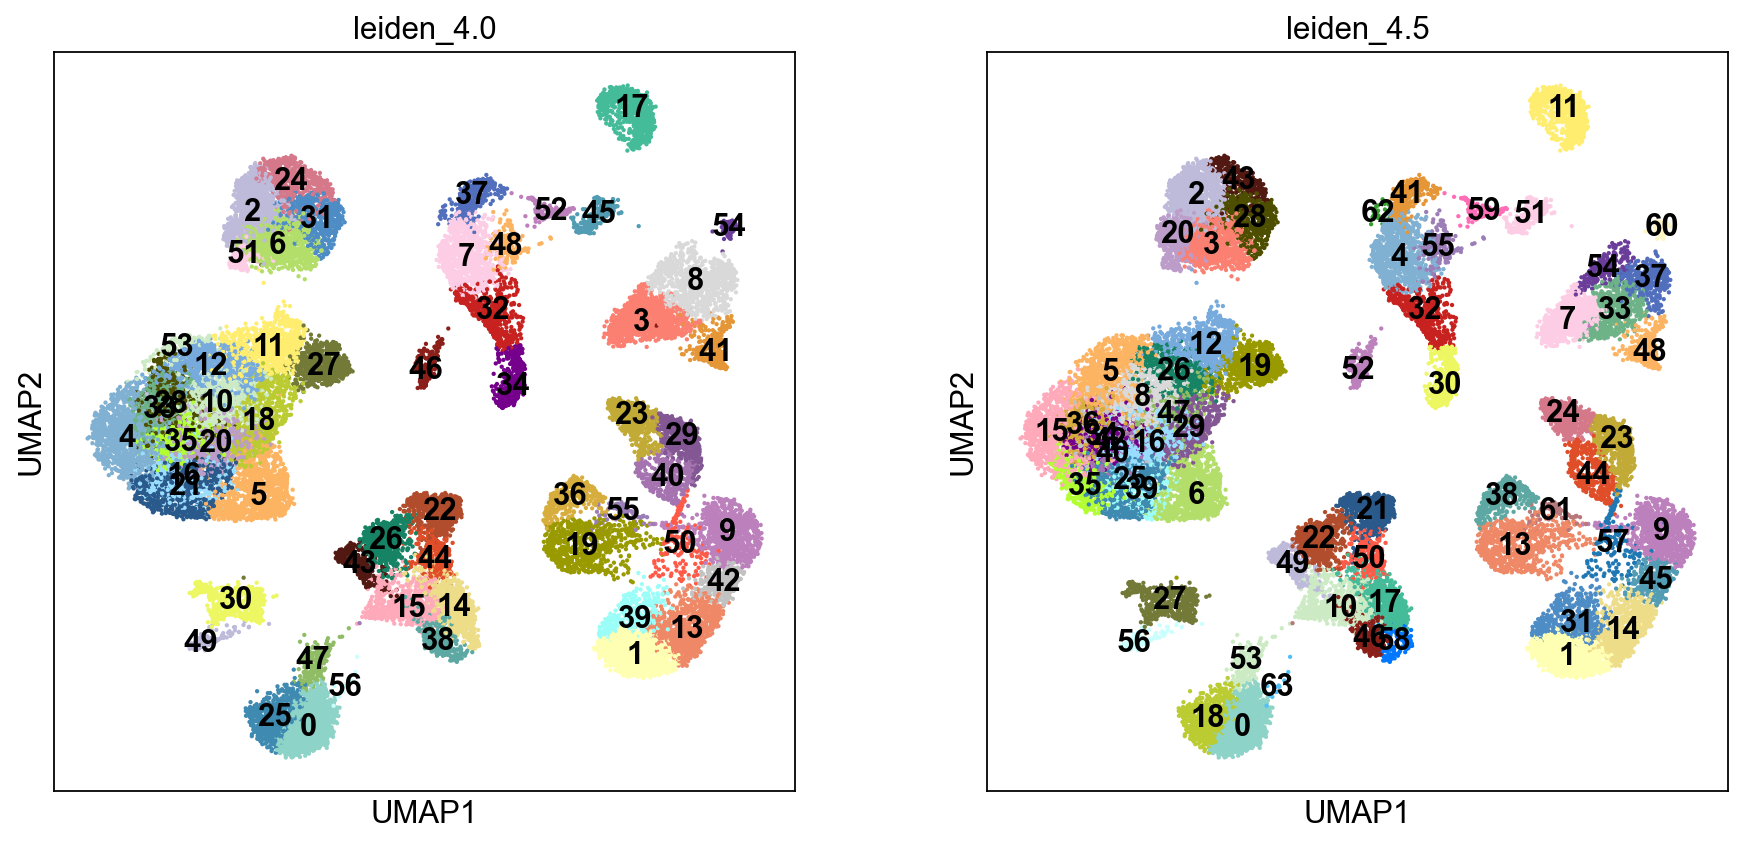

In [12]:
sc.pl.umap(adata, color=['leiden_4.0','leiden_4.5'], size=15, legend_loc='on data', palette=sm.wes)

In [13]:
sc.tl.leiden(adata, resolution = 8, key_added = "leiden_8")

running Leiden clustering
    finished: found 98 clusters and added
    'leiden_8', the cluster labels (adata.obs, categorical) (0:00:08)


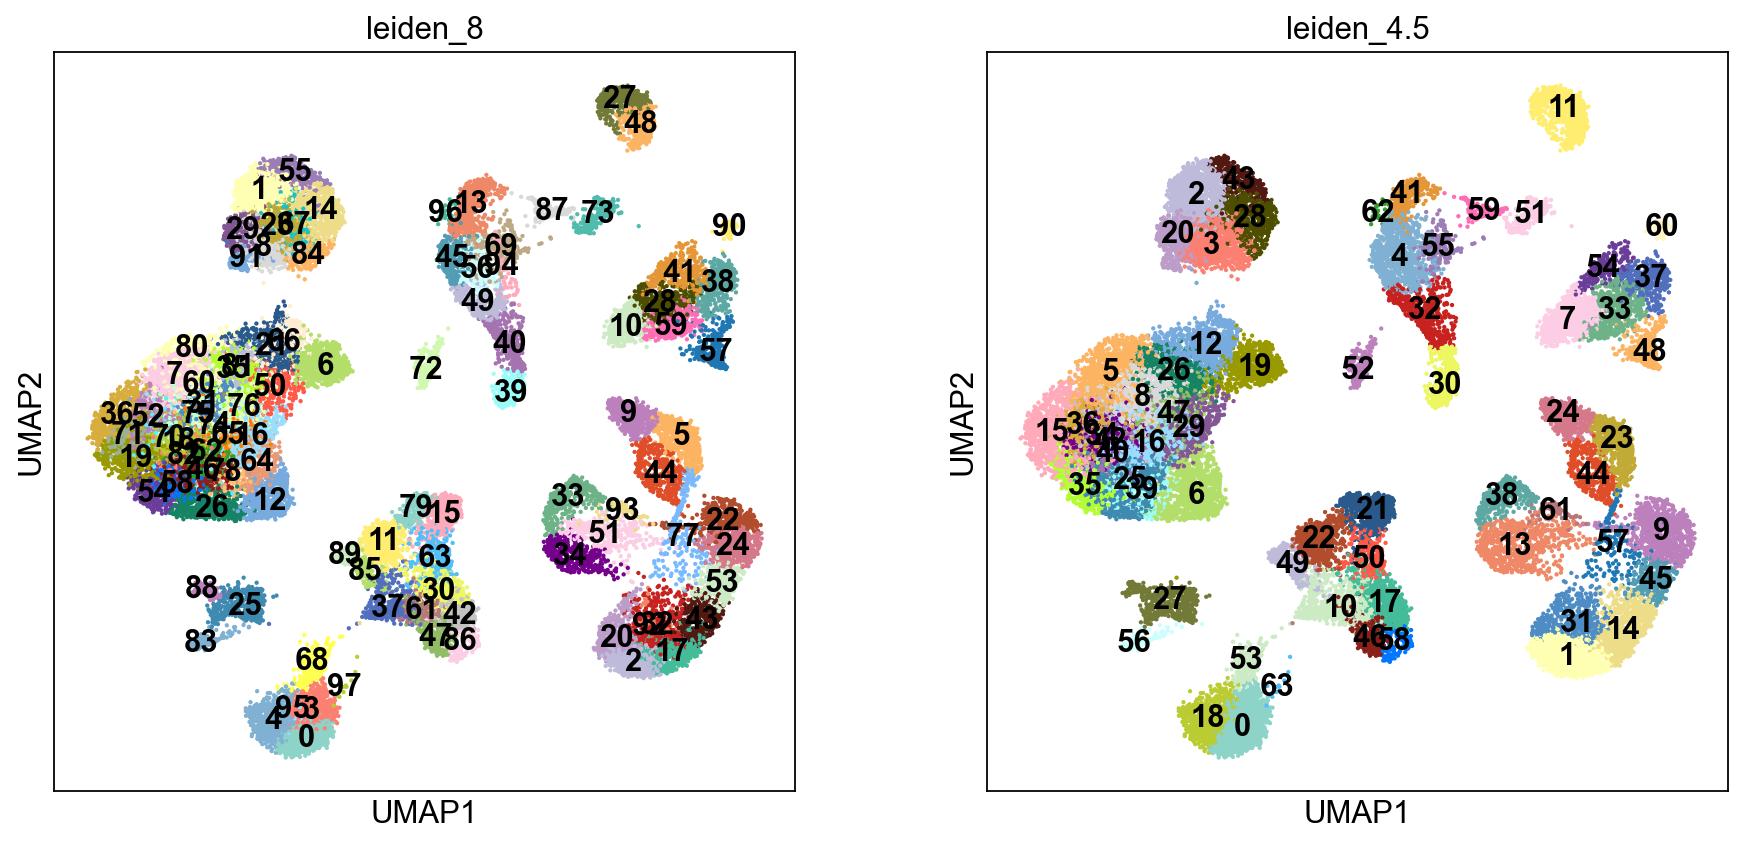

In [14]:
sc.pl.umap(adata, color=['leiden_8','leiden_4.5'], size=15, legend_loc='on data', palette=sm.wes)

Plot proportion of cells from each condition or sample per cluster.

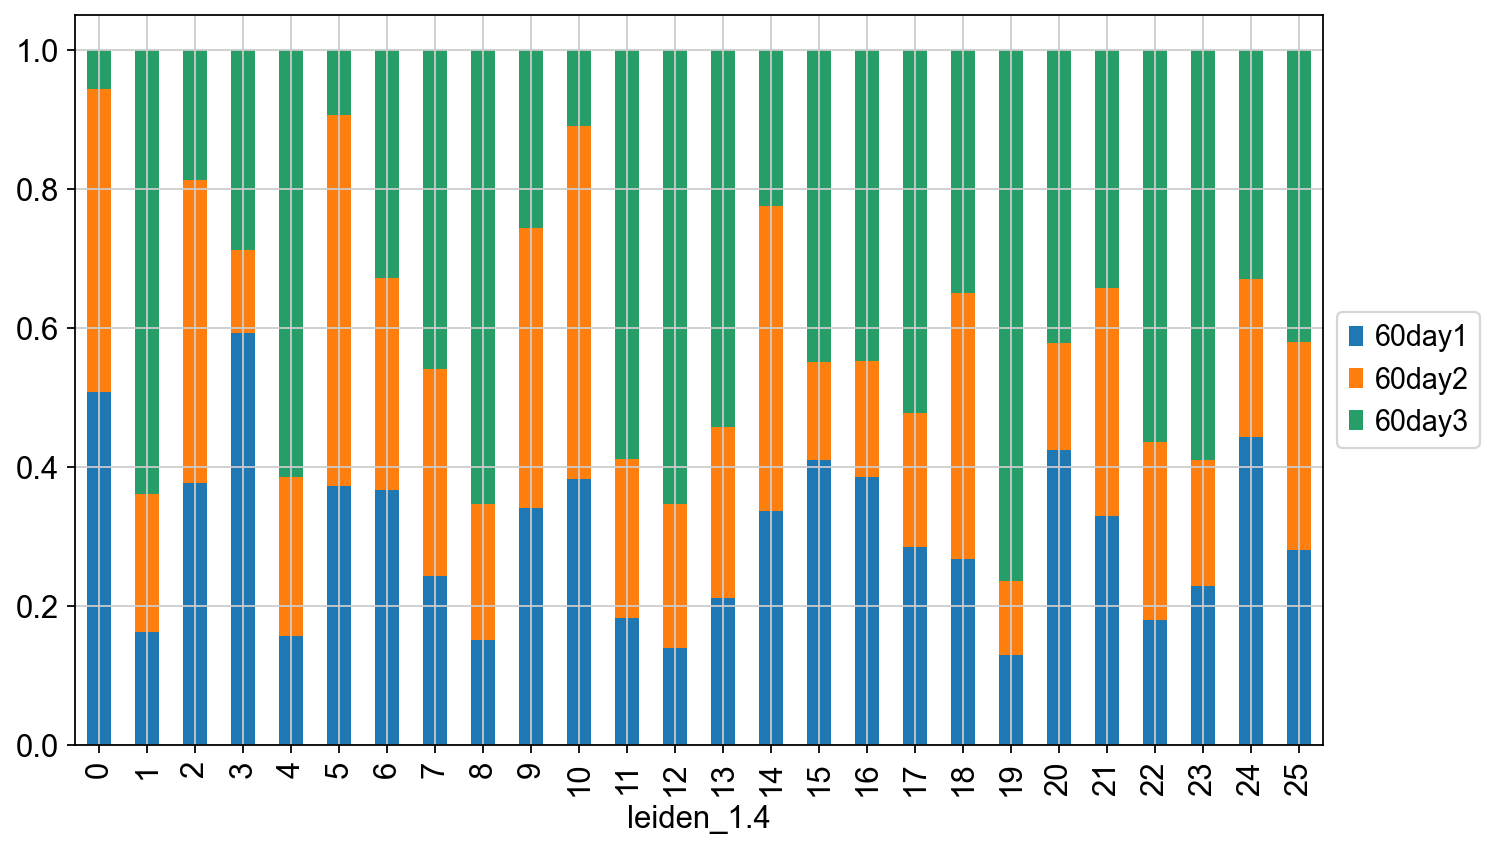

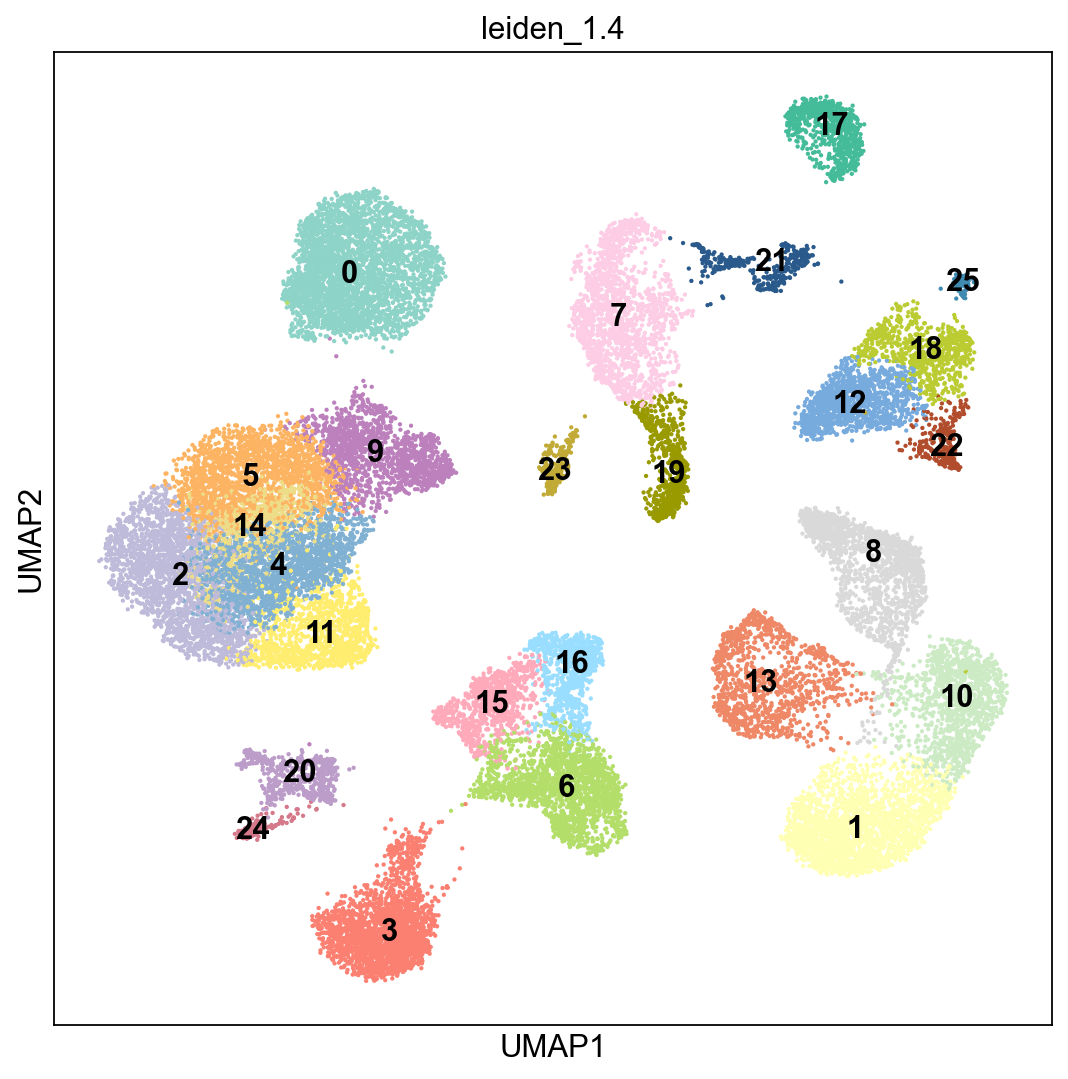

In [15]:
cluster_type = 'leiden_1.4'
rcParams['figure.figsize'] = 10, 6
tmp = pd.crosstab(adata.obs[cluster_type],adata.obs['sample'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 8, 8
sc.pl.umap(adata, color=cluster_type, size=15, legend_loc='on data')

In [16]:
clusters = adata.obs[cluster_type].cat.categories.tolist()
samples = adata.obs['sample'].cat.categories.tolist()
count_matrix = []

for cluster in clusters:
    c = adata[adata.obs[cluster_type] == cluster,:]
    count_list = []
    for sample in samples:
        count_list.append(len(c[c.obs['sample'] == sample,:]))
    count_matrix.append(count_list)

df = pd.DataFrame(count_matrix, columns=samples, index=clusters)
#Total sum per row: 
df.loc[:,'Total'] = df.sum(axis=1)
#Total sum per column: 
df.loc['Total',:]= df.sum(axis=0)
df

60day1  60day2   60day3    Total
0       1714.0  1473.0    188.0   3375.0
1        377.0   462.0   1484.0   2323.0
2        859.0   993.0    426.0   2278.0
3       1311.0   264.0    637.0   2212.0
4        307.0   445.0   1199.0   1951.0
5        720.0  1030.0    179.0   1929.0
6        692.0   577.0    620.0   1889.0
7        425.0   518.0    801.0   1744.0
8        236.0   306.0   1021.0   1563.0
9        471.0   559.0    354.0   1384.0
10       471.0   625.0    134.0   1230.0
11       221.0   276.0    712.0   1209.0
12       168.0   250.0    790.0   1208.0
13       243.0   284.0    626.0   1153.0
14       310.0   403.0    206.0    919.0
15       361.0   124.0    394.0    879.0
16       316.0   137.0    367.0    820.0
17       206.0   140.0    378.0    724.0
18       193.0   276.0    252.0    721.0
19        91.0    74.0    535.0    700.0
20       228.0    83.0    227.0    538.0
21       126.0   125.0    131.0    382.0
22        51.0    73.0    160.0    284.0
23        53.0    42.0    137.0    232.0
24        74.0    38.0     55.0    167.0
25        30.0    32.0     45.0    107.0
Total  10254.0  9609.0  12058.0  31921.0

### Hierarchical clustering
Use only if necessary to isolate a specific cluster not recognized by the Leiden clustering. Can be applied to either the PCA or UMAP reduced dimension representation of the data. Usually PCA, because of the interpretability of the low-dimensional distances.

In [17]:
from sklearn.cluster import AgglomerativeClustering
# extract pca or UMAP coordinates
X_pca = adata.obsm['X_pca']
X_umap = adata.obsm['X_umap']

In [18]:
n_clusters = 120 # set as needed
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
# adata.obs['hclust'] = cluster.fit_predict(X_pca).astype(str)
adata.obs['hclust'] = cluster.fit_predict(X_umap).astype(str)

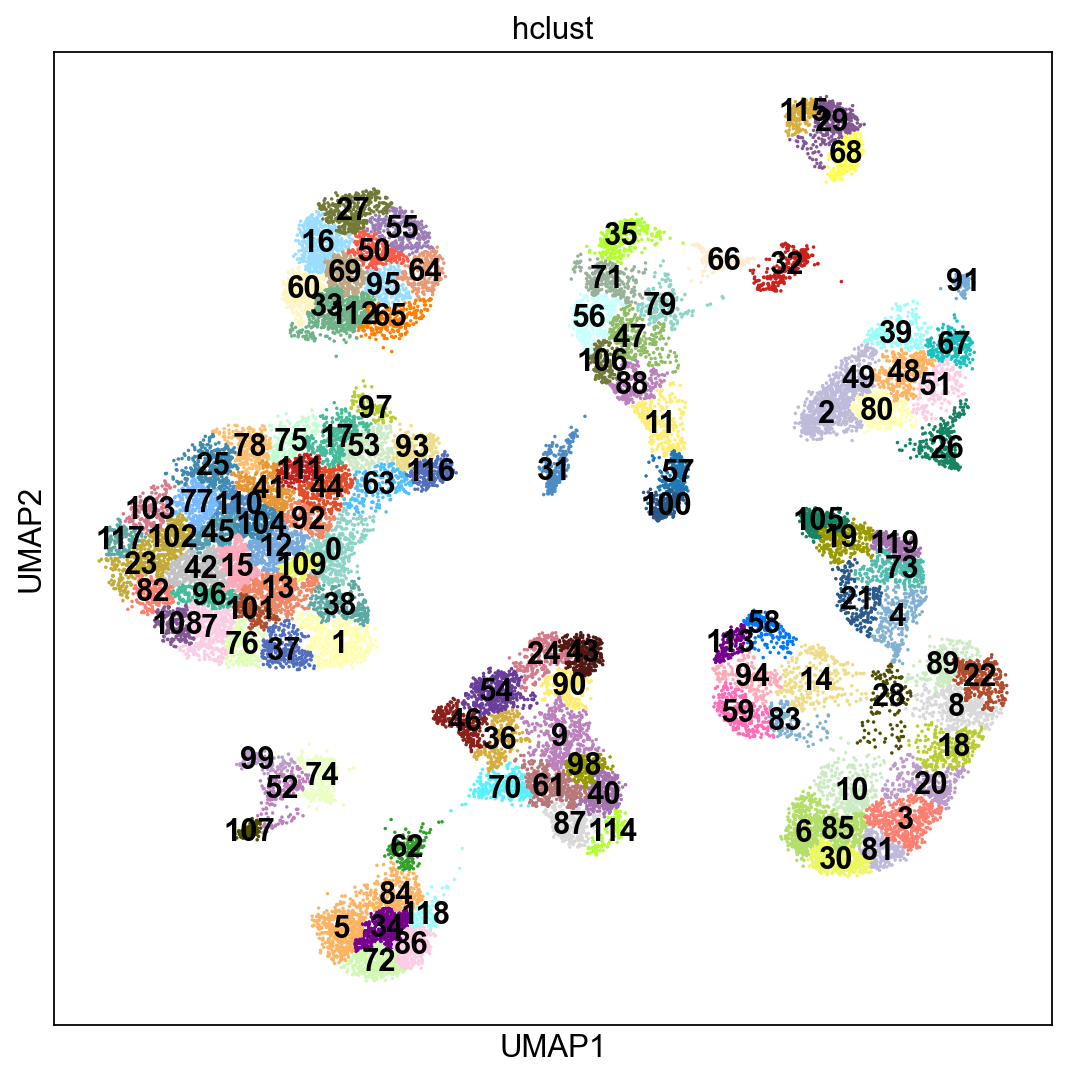

In [19]:
rcParams['figure.figsize'] = 8, 8
sc.pl.umap(adata, color=['hclust'], legend_loc='on data', size=10, palette=sm.wes)

### K-means clustering
Use only if necessary to pick out a different cluster.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [21]:
n_clusters = 80 # set as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_umap) 
adata.obs['kmeans'] = kmeans.labels_.astype(str)

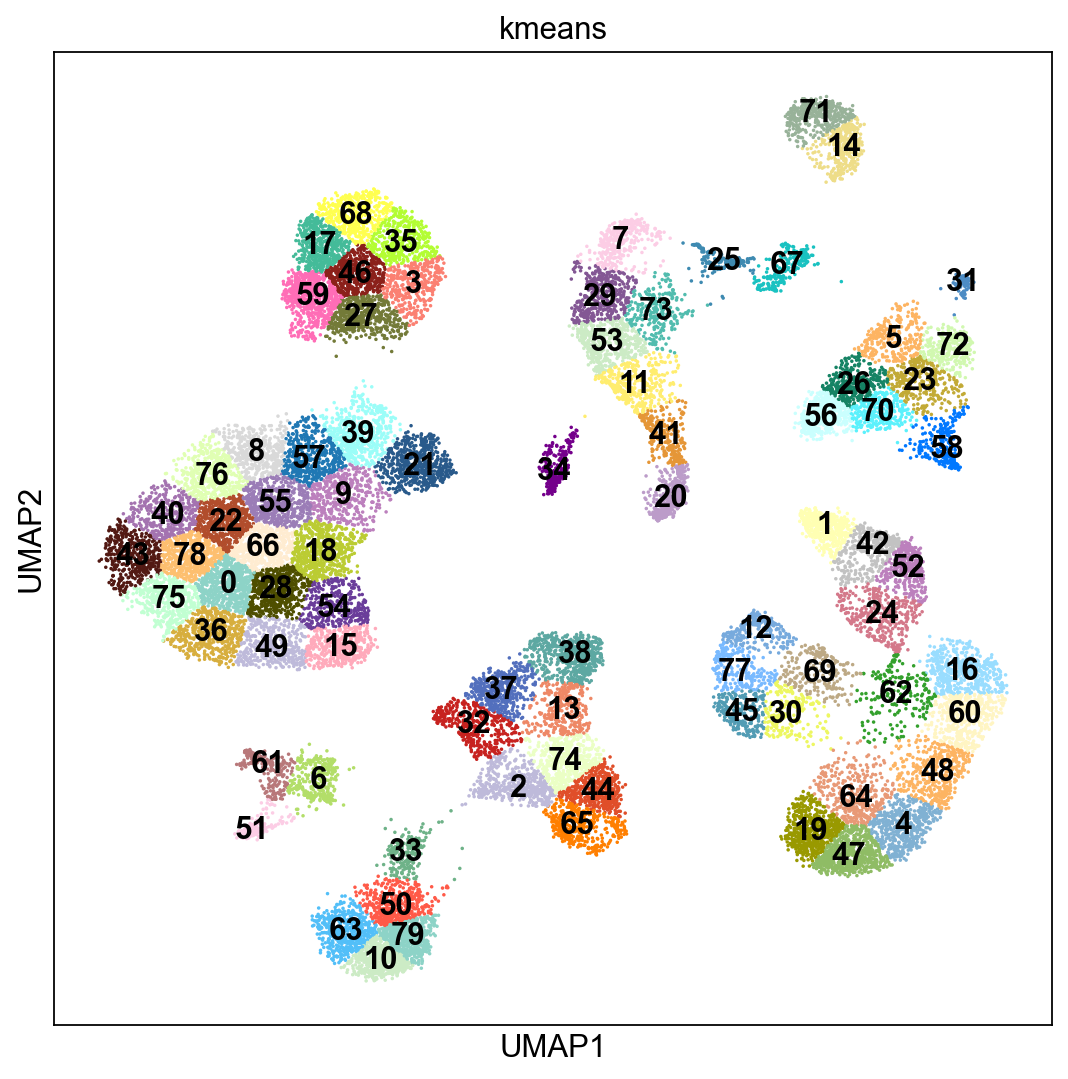

In [22]:
rcParams['figure.figsize'] = 8, 8
sc.pl.umap(adata, color=['kmeans'], legend_loc='on data', size=10, palette=sm.wes)

### Plot QC metrics by cluster

Plot QC metrics per cluster using the clustering method of choice. Check for bias in how data is separated due to quality metrics. Can it be explained biologically, or by technical bias? 

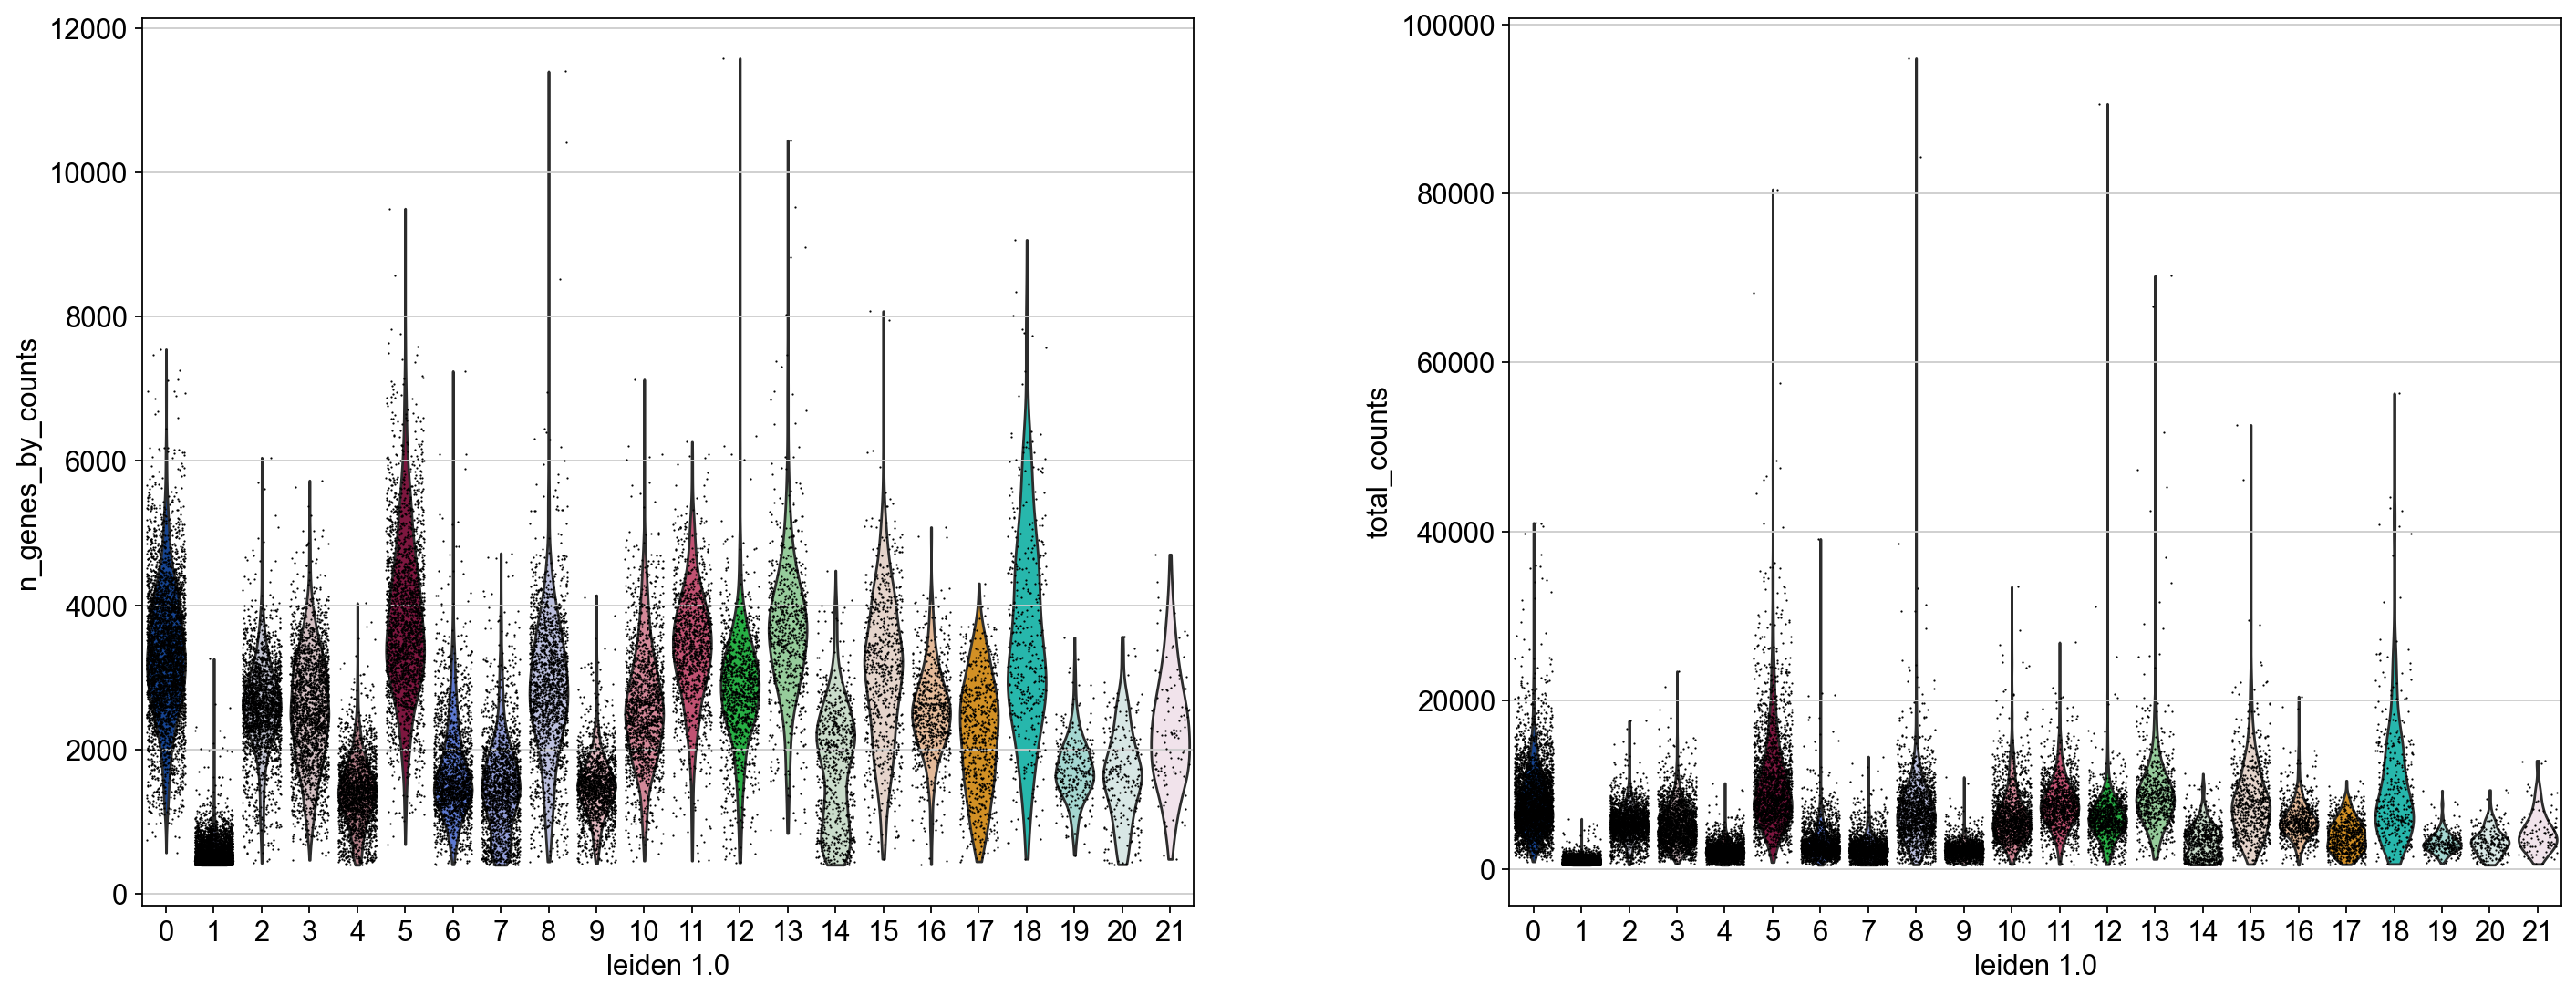

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, groupby='leiden_1.0')

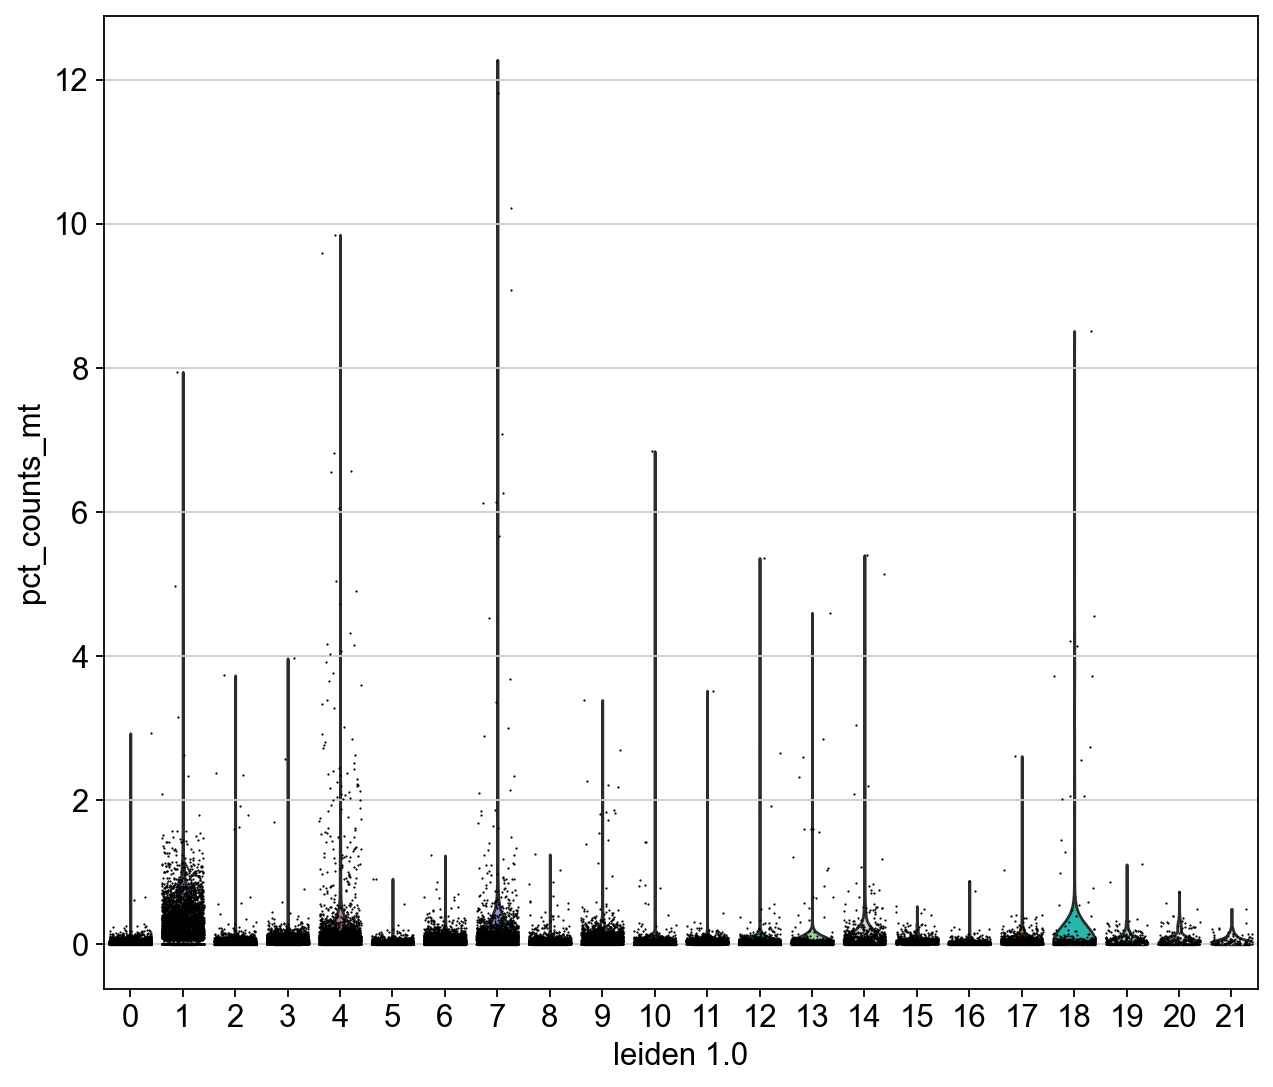

In [24]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4, groupby='leiden_1.0')

### Add clustering information to the filtered data set

In [26]:
# filtered_data = sc.read_h5ad(filtered_file)
# # create a new object with raw counts
# count_data = sc.AnnData(X = filtered_data.X, var = filtered_data.var, obs = adata.obs)

## Save Data
Save the data for further analysis.

In [27]:
adata.write_h5ad(clustered_file)

In [ ]:
# count_data.write_h5ad(clustered_filtered_file)